# Principles of Data Science

### Lecture 23: Expectation Maximisation and Gaussian Mixture Models

_MPhil in Data Intensive Science_

**University of Cambridge**

<h2 style="color: blue">Matt Kenzie</h2>

[mk652@cam.ac.uk](mailto:mk652@cam.ac.uk)

*The following lines **should** be included by default in all my lecture notebooks*

- Display matplotlib plots interactively

In [1]:
%matplotlib widget

- Do not display the canvas title of the plot (default is "Figure N")

In [2]:
%%html
<style>
div.jupyter-widgets.widget-label {display: none;}
</style>

- Import standard modules

In [3]:
import numpy as np
np.random.seed(210187)
import matplotlib.pyplot as plt
plt.style.use('../mphil.mplstyle')

## Expectation Maximisation and Gaussian Mixture Models

- Today's lecture covers two highly useful concepts: 
    - Expectation maximisation
    - Gaussian mixture models (GMMs)

- Learning objectives:
    - Be able to describe (mathematically) the expectation maximisation method
    - Be able to deploy common tools for obtaining Gaussian Mixture Models

## Expectation Maximisation

- Allows us to do inference in cases where we have *unobservable* / *hidden* / *latent* random variables?
    - Inherently Bayesian in nature so we will have to recall Bayes theorem
- We can make estimates of parameters which describe those variables
- Lots of use in **economics** and **social sciences**
- For example imagine a random variable like "happiness"
- I cannot really measure this (even if I ask people)
    - May suspect it has some dependence on other r.v.s like wealth, health, education, security etc.
    
- It is one of the most stunning applications of the <font color="blue">likelihood</font>

- Just take a moment to think about the significance of this in a machine learning / AI context!
    - <font color="green">*Discussion in the lecture*</font>

## Expectation Maximisation Theory

<font color="green">*See hand written notes in the lecture*</font>

- For observed r.v.(s) $X$ and hidden r.v.(s) $Y$

$$ L(\vec{\theta}|X,Y) = \prod_i^N p(X_i, Y_i| \vec{\theta}) $$

- If we could marginalise out $Y$

$$ L(\vec{\theta}|X) = \prod_i^N p(X_i | \vec{\theta}) \qquad \qquad \qquad \qquad \; \\
                     = \prod_i^N \int p(X_i,Y|\vec{\theta}) dY \qquad \; \\
                     = \prod_i^N \int p(X_i|Y, \vec{\theta}) p(Y|\vec{\theta}) dY $$


- Make a guess for initial parameters, $\theta_T$

- **Expectation Step**
   - Estimate *expected value* for hidden variable (based on likelihood)
   
   $$ T(\vec{\theta}|\theta_T) = E \left[ \ln p(X|Y,\vec{\theta}) \right] $$

- **Maximisation Step**
    - Optimise *parameter* by finding new $\theta_T$ that maximises the expectation $T(\vec{\theta}|\theta_T)$

$$ $$ 
- This is much easier to see by means of an example so let's do that

# <font color="darkred">*Musical interlude...*</font>

## An Expectation Maximisation Example

 - I have some data collected from a series of counting experiments
 - These are the counts of trains arriving at 3 different stations
 - Unforuntately I seem to have lost a record of which count comes from which station


 - I can express the problem as a mixture model in the following way
 
 $$ Y_i \sim \text{Categorical}(\pi_1, \pi_2, \pi_3 ) $$
 
 $$ X_i \sim \begin{cases} \text{Poisson}(\lambda_1) \;\; \text{if} \;\; Y_i = 1 \\
                           \text{Poisson}(\lambda_2) \;\; \text{if} \;\; Y_i = 2 \\ 
                           \text{Poisson}(\lambda_3) \;\; \text{if} \;\; Y_i = 3 
             \end{cases} $$
             
 - We have three possible populations, $Y_i$
 - Distribution of $X_i$ will depend which population they belong to
 - The probability of being from a population is $\pi$
$$ P(Y_i = j) = \pi_j \;\; \text{for} \;\; j \in \{1, 2, 3\} $$ 

 - Thus the $\pi$ should sum to unity
 
 $$ \sum_j \pi_j = 1 $$


- For the following assume there are $N$ data points and $k$ different populations
- Will use true values of

$$ \lambda_1 = 174, \quad \lambda_2 = 124, \quad \lambda_3 = 279 $$

$$ \pi_1 = 0.32, \quad \pi_2 = 0.28, \quad \pi_3 = 0.4 $$

- Let's generate some data...

In [4]:
from scipy.stats import poisson

# generate our data
stations = ['Paddington', 'Euston', 'Kings Cross']
lb_dict = {'Paddington': 174, 
           'Euston': 124,
           'Kings Cross': 279,}

pi_dict = {'Paddinton': 0.36,
           'Euston': 0.41,
           'Kings Cross': 0.23,}

lb_vals = np.array( list(lb_dict.values()) )
pi_vals = np.array( list(pi_dict.values()) )

N = 5000 
print( stations )
print( lb_vals )
print( pi_vals )

['Paddington', 'Euston', 'Kings Cross']
[174 124 279]
[0.36 0.41 0.23]


In [5]:
# first select the stations at random
true_station_index = np.random.choice( [0,1,2], size=N, p=pi_vals, replace=True )
true_lambda_value = lb_vals[true_station_index]

# then generate the data
X = np.random.poisson( true_lambda_value, size=N )

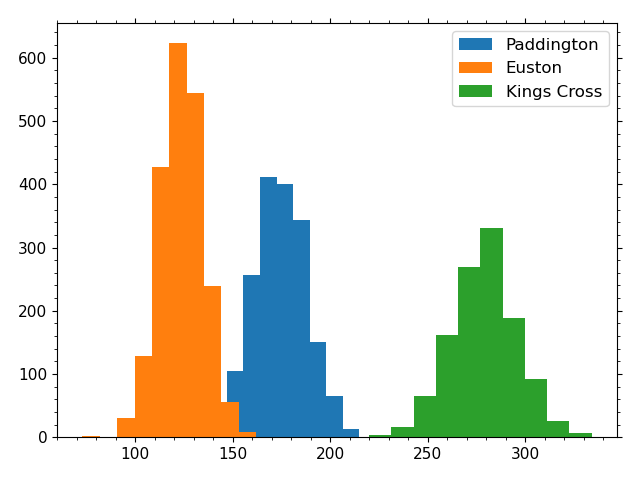

In [6]:
# plot them for my own sanity
color = {'Paddington': 'r', 'Euston': 'b', 'Kings Cross': 'g'}

fig, ax = plt.subplots()
for i, station in enumerate(stations):
    ax.hist( X[true_station_index==i], label=station)

ax.legend()

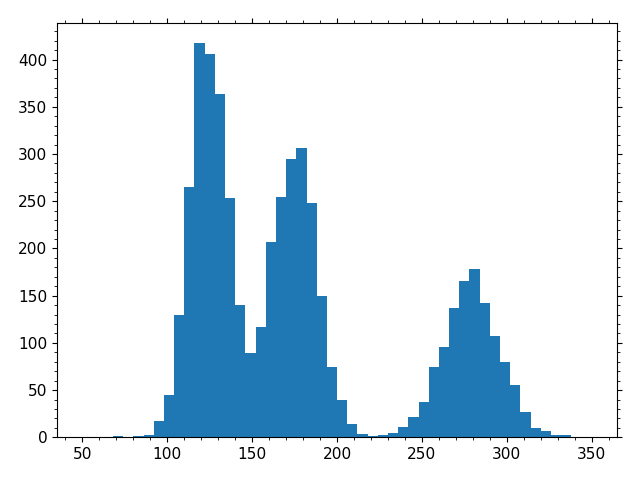

In [7]:
# plot the total to show in class
fig, ax = plt.subplots()
_ = ax.hist( X, bins=50, range=(50,350) )

- If this was a real life situation we could probably just fit the sum of three Poisson distributions here and be done
- Doesn't necessarily help us classify future events though

## The likelihood model

- The full likelihood looks like

$$ p(X,Y|\theta) = \prod_{i}^N p(X_i|Y_i,\theta) p(Y_i|\theta) $$

- Can expand also over the components
$$ p(X,Y|\theta) = \prod_i^N \prod_j^k \bigl[ p(X_i|Y_i,\theta) p(Y_i|\theta) \bigr] ^{\mathcal{I}(Y_i=j)} $$
where
$$ \mathcal{I}(Y_i=j) = \begin{cases} 1 \quad \text{if} \quad Y_i = j \\
                                      0 \quad \text{otherwise} \end{cases} $$

- Take the log
$$ \ln p(X,Y|\theta) = \sum_i^N \sum_j^k \mathcal{I}(Y_i=j) \bigl[ \ln p(X_i|Y_i=j,\theta) + \ln p(Y_i=j|\theta) \bigr] $$

- The issue is this *indicator* function which we do not know how to evaluate
    - We do not know for a given event $i$ what the value of $Y_i$ is
$$ $$

- Solution is to use the **expectation** of the log-likelihood replacing the indictor function with the posterior (i.e. best guess of the indicitor function) using some intial guess of $\theta$, called $\theta_T$

$$ T(\theta| \theta_T) = E \left[ \ln p(X, Y | \theta) \right] \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \;\; \\
                       = \sum_i^N \sum_j^k p(Y_i=j| X_i, \theta_T) \bigl[ \ln p(X_i|Y_i=j,\theta) + \ln p(Y_i=j|\theta) \bigr] $$
                       
- Based on the initial guess, $\theta_T$, we then maximise this for our parameters $\theta$ and repeat until convergence

## Taking the terms above one by one:

- **The prior** - probability of the population
    $$ p(Y_i=j | \theta) = \pi_j $$
- **The conditional** - distribution in $X$ of the population
    $$ p(X_i | Y_i = j, \theta) = \text{Poisson}(X_i, \lambda_j) $$
- **The posterior** - probability of cluster given the data value in $X$
    $$ p(Y_i = j| X_i, \theta_T ) = \frac{p(Y_i=j, X_i | \theta_T) }{ p(X_i | \theta_T) } \qquad \qquad \qquad \qquad \qquad \qquad \; \\
                                  = \frac{p(X_i| Y_i=j, \theta_T)p(Y_i=j|\theta_T)}{ \displaystyle\sum_m^k p(X_i| Y_i=m, \theta_T)p(Y_i=m|\theta_T) } \\
                                  = \frac{ \pi_j \text{Poisson}(X_i, \lambda_j) }{ \displaystyle\sum_m^k \pi_m \text{Poisson}(X_i, \lambda_m) } \qquad \qquad $$

- Notice how the posterior here only depends on the guess $\theta_T$


In [8]:
## let's code this up
from numba_stats import poisson as fpoiss

def prior(pis):
    return np.log(pis)

def conditional(X, lambdas, pis):
    return np.asarray( [ fpoiss.logpmf(X, lb ) for lb in lambdas ] )

def posterior(X, lambdas, pis ):
    numerator = np.array( [ pi * fpoiss.pmf(X, lb) for pi, lb in zip(pis, lambdas) ] )
    denominator = np.sum( numerator, axis=0 )
    return numerator / denominator
    


## There is an analytical solution in this case

$$ T(\theta| \theta_T) = \sum_i^N \sum_j^k p(Y_i=j| X_i, \theta_T) \bigl[ \ln p(X_i|Y_i=j,\theta) + \ln p(Y_i=j|\theta) \bigr] \qquad \qquad \qquad \; \\
= \sum_i^N \sum_j^k p(Y_i=j| X_i, \theta_T) \biggl[ \ln \left( \frac{\lambda_j^{X_i}e^{-\lambda_k}}{X_i!} \right) + \ln \pi_j \biggr] \qquad \qquad \qquad \quad \; \\
= \sum_i^N \sum_j^k p(Y_i=j| X_i, \theta_T) \left[ -\lambda_k + X_i \ln (\lambda_k) - X_i \ln(X_i!) - X_i + \ln \pi_j \right] $$

- Labelling the posterior (only depends on the initial guess), $P_{i,j} = p(Y_i=j|X_i, \theta_T)$ 

- Can find where this is maximised by differentiating and solving for each parameter in $\theta = \{\pi_1,\pi_2,\pi_3, \lambda_1, \lambda_2, \lambda_3 \}$

- Solution is

$$ \hat{\pi}_j = \frac{\displaystyle\sum_i^N P_{i,j} }{ \displaystyle\sum_i^N \displaystyle\sum_m^k P_{i,m} } $$

$$ \hat{\lambda}_j = \frac{\displaystyle\sum_i^N P_{i,j} X_i }{ \displaystyle\sum_i^N P_{i,j} } $$

In [9]:
## plugin some initial guess to compute the posteriors
mean = np.mean(X)
pi_T = [0.1, 0.4, 0.25]
lb_T = [mean-20, mean, mean+20]

def expect_max_from_guess(pi_T, lb_T):
    post = posterior(X, lb_T, pi_T)
    pi_hat = np.sum( post, axis=1 ) / np.sum( post )
    lb_hat = np.sum( post*X, axis=1) / np.sum( post, axis=1)
    return pi_hat, lb_hat
    
pi_hat, lb_hat = expect_max_from_guess(pi_T, lb_T)

print( '1st iteration:' )
print( '  pi_hat ', pi_hat )
print( '  lb_hat ', lb_hat )
print( '  pi_true', pi_vals )
print( '  lb_true', lb_vals )


1st iteration:
  pi_hat  [0.45353694 0.2468384  0.29962466]
  lb_hat  [128.16866256 171.39516136 257.88287956]
  pi_true [0.36 0.41 0.23]
  lb_true [174 124 279]


## If we don't have the analytical solution

- Often can't (or can't be bothered) to compute the analytical solution
- Need to maximise the expected log-likelihood
- Let's just use `iminuit` to do this


In [10]:
# the expectation of the log likelihood
def exp_log_likelihood(X, lambdas, pis, lambdas_T, pis_T):
    post = posterior(X, lambdas_T, pis_T )
    cond = conditional(X, lambdas, pis)
    prio = prior(pis).reshape((-1,1))
    sum_over_j = np.sum( post * ( cond + prio ), axis=0 )
    sum_over_N = np.sum( sum_over_j )
    return sum_over_N

# and re-expressed for the minimiser
def min_func( pi1, pi2, lb1, lb2, lb3):
    pi3 = 1 - pi1 - pi2
    return -exp_log_likelihood(X, [lb1,lb2,lb3], [pi1,pi2,pi3], lb_T, pi_T)

from iminuit import Minuit
mi = Minuit( min_func, pi1=0.2, pi2=0.4, lb1=120, lb2=170, lb3=210 )
mi.limits['pi1','pi2'] = (0,0.5)
mi.limits['lb1','lb2','lb3'] = (80,300)
mi.migrad()
print(mi)

pi_hat = [ mi.values['pi1'], mi.values['pi2'], 1 - mi.values['pi1'] - mi.values['pi2'] ]
lb_hat = [ mi.values['lb1'], mi.values['lb2'], mi.values['lb3'] ]

print( '1st iteration:' )
print( '  pi_hat ', pi_hat )
print( '  lb_hat ', lb_hat )
print( '  pi_true', pi_vals )
print( '  lb_true', lb_vals )


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.118e+04                  │              Nfcn = 156              │
│ EDM = 1.17e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

## And now we just iterate until convergence

- Usually using some metric for "convergence"
- In this case let's say until no parameters are changing by more than 0.1% of their value

In [11]:
# starting guess
mean = np.mean(X)
pi_T = [0.2, 0.3, 0.5]
lb_T = [mean-20,mean,mean+20]

niter = 0
threshold = 0.001
within_threshold = False

# might be expensive but let's keep track of pars at each iter
pis = [ pi_T ]
lbs = [ lb_T ]

print(' nIt |   pi1   pi2   pi3 |    lb1     lb2     lb3')
print('-------------------------------------------------')
print(f'{niter:4d} | {pi_T[0]:5.3f} {pi_T[1]:5.3f} {pi_T[2]:5.3f} | {lb_T[0]:6.2f}  {lb_T[1]:6.2f}  {lb_T[2]:6.2f}')

while not within_threshold:
    
    pi_T1, lb_T1 = expect_max_from_guess(pi_T, lb_T)
    
    pis.append( pi_T1 )
    lbs.append( lb_T1 )
    
    diffs = np.concatenate( [np.abs( pi_T1 - pi_T )/pi_T, np.abs( lb_T1 - lb_T )/lb_T ] )
    
    pi_T = pi_T1
    lb_T = lb_T1
    
    niter += 1
    
    
    within_threshold = np.all( diffs < threshold )
    
    print(f'{niter:4d} | {pi_T[0]:5.3f} {pi_T[1]:5.3f} {pi_T[2]:5.3f} | {lb_T[0]:6.2f}  {lb_T[1]:6.2f}  {lb_T[2]:6.2f}')

print('-------------------------------------------------')
print(f'TRUE | {pi_vals[0]:5.3f} {pi_vals[1]:5.3f} {pi_vals[2]:5.3f} | {lb_vals[0]:6.2f}  {lb_vals[1]:6.2f}  {lb_vals[2]:6.2f}')
    
    



 nIt |   pi1   pi2   pi3 |    lb1     lb2     lb3
-------------------------------------------------
   0 | 0.200 0.300 0.500 | 157.70  177.70  197.70
   1 | 0.500 0.160 0.340 | 130.94  172.35  248.83
   2 | 0.443 0.320 0.237 | 125.96  175.74  277.06
   3 | 0.423 0.345 0.232 | 124.55  175.07  278.59
   4 | 0.418 0.350 0.232 | 124.21  174.69  278.60
   5 | 0.416 0.352 0.232 | 124.11  174.56  278.59
   6 | 0.415 0.353 0.232 | 124.08  174.52  278.59
   7 | 0.415 0.353 0.232 | 124.07  174.51  278.59
-------------------------------------------------
TRUE | 0.360 0.410 0.230 | 174.00  124.00  279.00


- Pretty cool eh?
- The swapping of types is an unavoidable ambiguity
- So let's plot the result

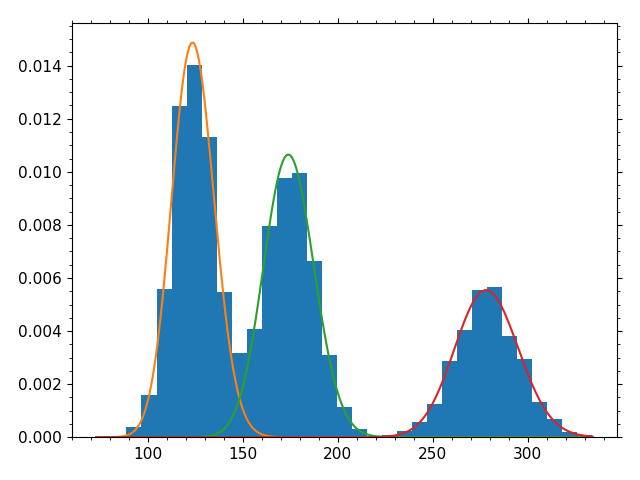

In [12]:
fig, ax = plt.subplots()
nh, xe, _ = ax.hist( X, bins='auto', density=True )
x = np.arange(xe[0],xe[-1]+1)

for pi, lb in zip(pi_T, lb_T):
    ax.plot(x, pi*fpoiss.pmf(x,lb))

Text(0, 0.5, '$\\hat{\\lambda}$')

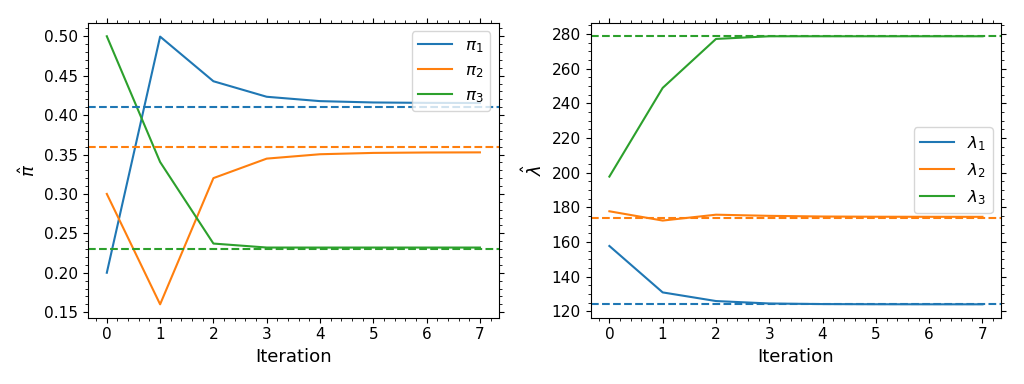

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(0.8*12.8, 0.8*4.8))
niters = len(pis)
iters = range(0, niters)
pis = np.asarray(pis)
lbs = np.asarray(lbs)
ax[0].plot( iters, pis[:,0], label='$\pi_1$' )
ax[0].plot( iters, pis[:,1], label='$\pi_2$' )
ax[0].plot( iters, pis[:,2], label='$\pi_3$' )
ax[0].axhline( pi_vals[0], c='C1', ls='--' )
ax[0].axhline( pi_vals[1], c='C0', ls='--' )
ax[0].axhline( pi_vals[2], c='C2', ls='--' )
ax[0].legend()
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('$\hat{\pi}$')
ax[1].plot( iters, lbs[:,0], label='$\lambda_1$' )
ax[1].plot( iters, lbs[:,1], label='$\lambda_2$' )
ax[1].plot( iters, lbs[:,2], label='$\lambda_3$' )
ax[1].axhline( lb_vals[0], c='C1', ls='--' )
ax[1].axhline( lb_vals[1], c='C0', ls='--' )
ax[1].axhline( lb_vals[2], c='C2', ls='--' )
ax[1].legend()
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('$\hat{\lambda}$')

## Expectation Maximisation in practise

- Most common use case is for Gaussian Mixture Models (GMMs)
- Used in unsupervised clustering algorithms
- Implementing this for your own use case is impractical
- Exploit a package e.g `sklearn.mixture.GaussianMixture`
- Here's a quick example

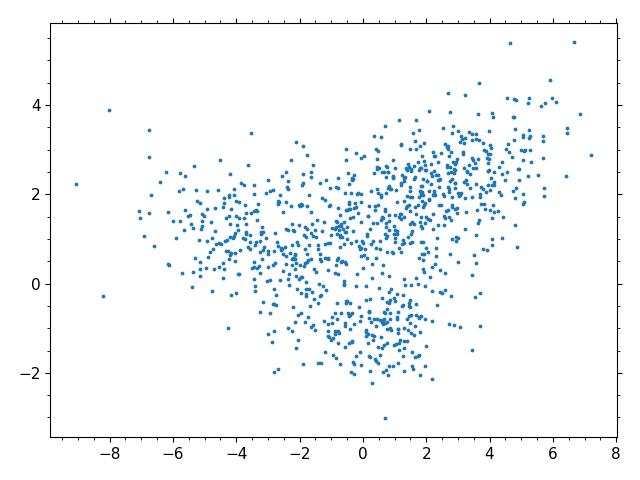

In [14]:
from scipy.stats import multivariate_normal as mvn
from sklearn.mixture import GaussianMixture

# generate some data in 2D from 3 different Gaussians
m1 = [2,2]
c1 = [[4,1],[1,1]]

m2 = [-3,1]
c2 = [[3.5,-0.5],[-0.5,1]]

m3 = [0.4,-1]
c3 = [[2,0.1],[0.1,0.5]]

mvn1 = mvn(mean=m1,cov=c1)
mvn2 = mvn(mean=m2,cov=c2)
mvn3 = mvn(mean=m3,cov=c3)

f1 = 0.5
f2 = 0.3

N = 1000
 
dset1 = mvn1.rvs(size=int(f1*N))
dset2 = mvn2.rvs(size=int(f2*N))
dset3 = mvn3.rvs(size=int((1-f1-f2)*N))

dsets = [ dset1, dset2, dset3 ]

dset = np.concatenate( [dset1, dset2, dset3] )

fig, ax = plt.subplots()
ax.scatter( dset[:,0], dset[:,1], s=3 )


In [15]:
# make the GMM 
gmm = GaussianMixture(n_components=3, means_init=[[1,1],[-1,1],[0,0]])
gmm.fit(dset)

GaussianMixture(means_init=array([[ 1.,  1.],
       [-1.,  1.],
       [ 0.,  0.]]),
                n_components=3)

- Now plot the result
- (Exploiting some functions hidden in the slides but available in the notebook)

In [16]:
# draw entire GMM 
def draw_gmm( gm, ax=None, **kwargs ):
    ax = ax or plt.gca()

    x = np.linspace( *ax.get_xlim(), 100 )
    y = np.linspace( *ax.get_ylim(), 100 )

    X, Y = np.meshgrid(x, y)
    pos = np.stack((X.flatten(),Y.flatten()),axis=1)
    Z = -2*gm.score_samples(pos).reshape(100,100)
    Z = Z - np.min(Z)
    ax.contour(X, Y, Z, levels=[1,4], **kwargs )

# draw single MVN component
def draw_mvn( mv, ax=None, **kwargs ):
    ax = ax or plt.gca()

    x = np.linspace( *ax.get_xlim(), 100 )
    y = np.linspace( *ax.get_ylim(), 100 )

    X, Y = np.meshgrid(x, y)
    X, Y = X.T, Y.T
    pos = np.dstack((X,Y))

    lnZ = 2 * ( mv.logpdf( mv.mean ) - mv.logpdf(pos) )
    ax.contourf(X, Y, lnZ, levels=[0,1,4], alpha=0.2, **kwargs )
    ax.contour(X, Y, lnZ, levels=[1,4], linewidths=2, **kwargs )
    
# draw combined MVN
def draw_mvns( mvs, fs, ax=None, **kwargs ):
    ax = ax or plt.gca()
    
    x = np.linspace( *ax.get_xlim(), 100 )
    y = np.linspace( *ax.get_ylim(), 100 )
    
    X, Y = np.meshgrid(x, y)
    X, Y = X.T, Y.T
    pos = np.dstack((X,Y))
    
    p = np.sum( [ f*mv.pdf(pos) for f, mv in zip(fs, mvs) ], axis=0 )
    pm = np.sum( [ f*mv.pdf(mv.mean) for f, mv in zip(fs, mvs) ], axis=0 )
    
    lnZ = -2 * np.log(p)
    
    lnZ = lnZ - np.min(lnZ)
    
    ax.contour(X, Y, lnZ, levels=[1,4], linewidths=2, **kwargs)

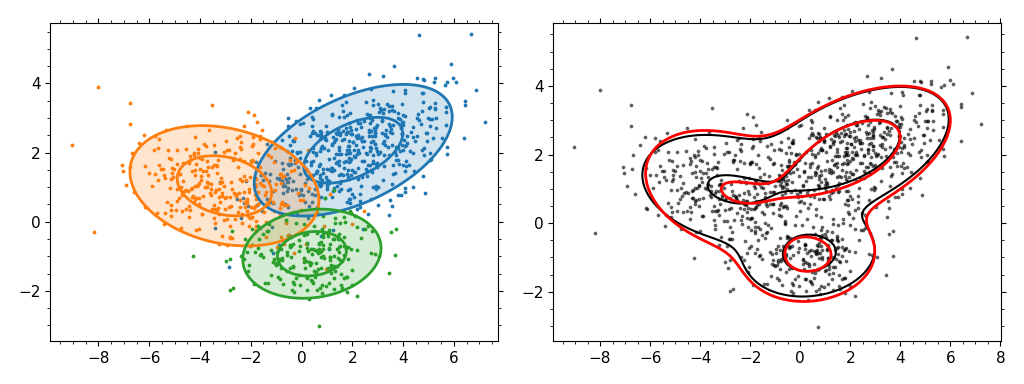

In [17]:
# draw the results
fig, ax = plt.subplots(1, 2, figsize=(0.8*12.8, 0.8*4.8))

for icomp in range(gmm.n_components):
    fmvn = mvn( gmm.means_[icomp], gmm.covariances_[icomp] )
    ax[0].scatter( dsets[icomp][:,0], dsets[icomp][:,1], s=3, c=f'C{icomp}')
    draw_mvn( fmvn, ax=ax[0], colors=f'C{icomp}' )
    
ax[1].scatter( dset[:,0], dset[:,1], s=3, c='k', alpha=0.5 )
draw_gmm( gmm, ax=ax[1], colors='k' )
draw_mvns( [mvn1, mvn2, mvn3], [f1, f2, 1-f1-f2], ax=ax[1], colors='r' )

# End of Lecture 23

By the end of this lecture you should:
 - Be able to describe (mathematically) the expectation maximisation method
 - Be able to deploy common tools for obtaining Gaussian Mixture Models